X.shape: (26, 2)


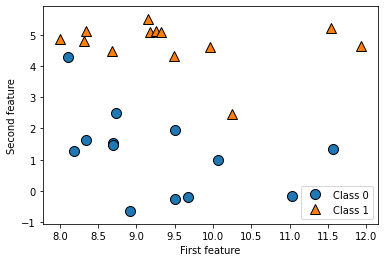

In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# データセット生成
X, y = mglearn.datasets.make_forge()
# プロット
mglearn.discrete_scatter(X[:,0], X[:,1], y)
# loc... 1,2,3,4でラベル説明の位置
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

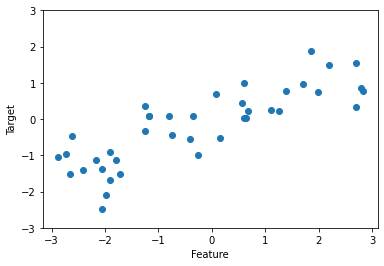

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [3]:
# 乳がんの腫瘍が悪性か予測してみる

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Cancer keys(): \n{}".format(cancer.keys()))

Cancer keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [5]:
# zip(): https://note.nkmk.me/python-zip-usage-for/
# n: v にそれぞれ zip() で合成した配列を代入していく
# np.bincount(): 0(良性), 1(悪性)が何個あるかを集計 [0,1]の順
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [6]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
# ボストンの住宅地の住宅価格の中央値を推測する
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [9]:
# 特徴量間の積を拡張したデータセット
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))
# 13 + 91(13から2つを選ぶ重複あり組み合わせ: 13+2 -1C2| 14!/(12!2!))

X.shape: (506, 104)


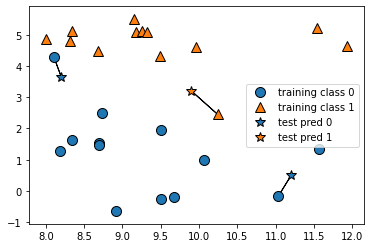

In [10]:
# 用意した二つのデータセットを用いて機械学習アルゴリズムの特徴を見ていく

# k-NN
mglearn.plots.plot_knn_classification(n_neighbors=1)

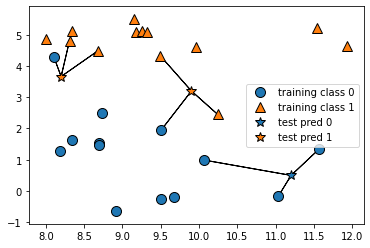

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


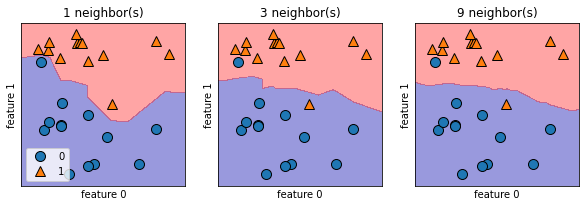

In [17]:
# 決定境界を見てみる
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fitメソッドは自身を返してるから1行でインスタンス生成してfitできる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

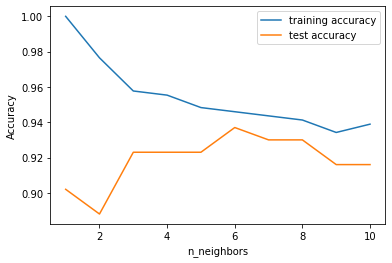

In [18]:
from sklearn.datasets import load_breast_cancer

# 各n点で分類する時の訓練セットに対する性能とテストセットに対する性能をみる

cancer = load_breast_cancer()
# stratufy= https://note.nkmk.me/python-sklearn-train-test-split/
# 訓練データとテストデータでのデータの比率を揃える
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1~10まで試す
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

上の例では、最近傍点が小さいほど複雑なモデルとなっている

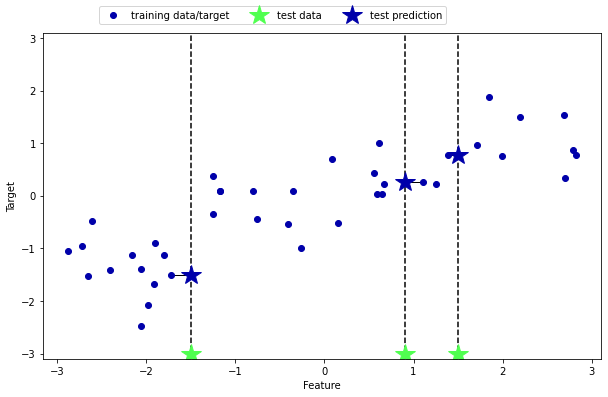

In [19]:
# k-近傍回帰

mglearn.plots.plot_knn_regression(n_neighbors=1)
# 緑色がテストデータ、予測結果が青星

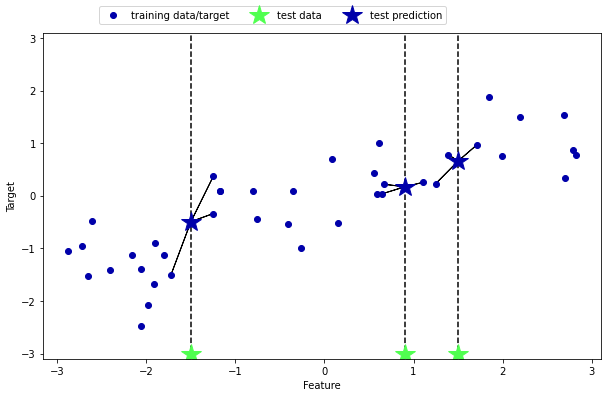

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
# 最近傍点の平均をとっている

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
# モデルの評価 R^2スコアを返している。決定係数と呼ばれ、0~1までの値。
print("Test score R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test score R^2: 0.83


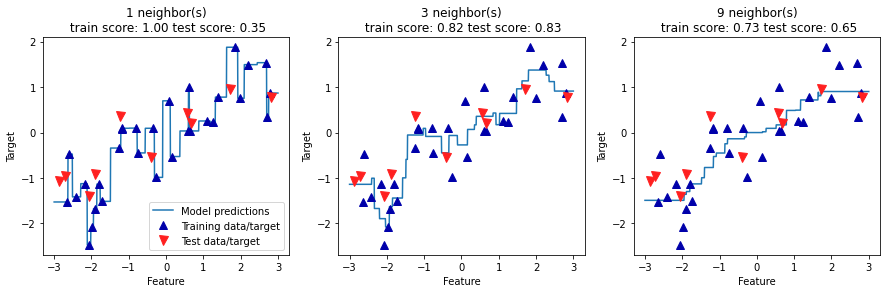

In [24]:
# 1つのデータセットに対して、全ての値に対する予測値
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3から3までの間に1000点のデータポイントを作成
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=9)

    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

# plotしたデータごとに名前をつけてる
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

```python
>>> import numpy as np
>>> line = np.linspace(-3, 3, 10)
>>> print(line)
[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]
>>> line.reshape(-1, 1)
array([[-3.        ],
       [-2.33333333],
       [-1.66666667],
       [-1.        ],
       [-0.33333333],
       [ 0.33333333],
       [ 1.        ],
       [ 1.66666667],
       [ 2.33333333],
       [ 3.        ]])
>>> 
```

w[0]: 0.393906  b: -0.031804


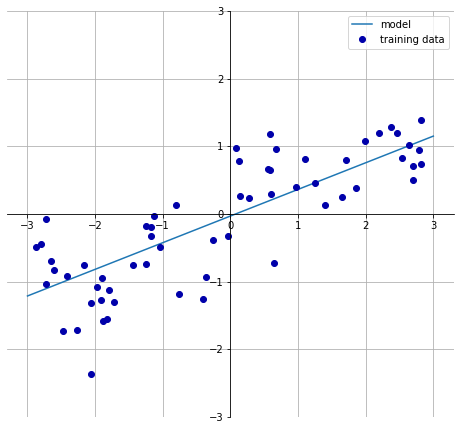

In [25]:
# 線形モデル
mglearn.plots.plot_linear_regression_wave()

In [28]:
# 線形回帰(通常最小二乗法)

from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

# 傾きを示すパラメータは重み・係数(coefficient)と言われ、coef_ 属性に格納される
# 切片(intercept)は intercept_ に

In [29]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [32]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# スコアはよくはないが、訓練セットとテストセットの値が近い。適合不足であって、過剰適合ではない
# 特徴量が少ない=モデルが単純であれば過剰適合の危険は少ないが、特徴量が多いデータセットでは線形モデルは強力になり過剰適合になりやすい

Training set score: 0.67
Test set score: 0.66


In [33]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [34]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# 差が大きい=過剰適合が起きてる兆候。複雑度を制御できるモデルを探さなくてはならない。
# 線形回帰に代る一般的な手法は、リッジ回帰

Training set score: 0.95
Test set score: 0.61


In [35]:
# リッジ回帰は、個々の特徴量の重みをなるべく0にする。→ここの特徴量が出力に与える影響を小さくしたい
# 過剰適合を防ぐために明示的にモデルを制約する(正則化 regularization)

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [36]:
# Rdgeモデルでは制約の強いモデルだから過剰適合の危険は少ない
# モデルの簡潔さ(0に近い係数の数)と訓練セットに対する性能はトレードオフ
# alphaパラメータを使ってどちらに重きをおくか指定できる
# alphaを増やすと係数wはより0に近くなる→訓練セットに対する性能↓、汎化性能↑？

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [37]:
# alphaを小さくすると係数の制約は小さくなる→モデルの複雑度があがる。めっさ小さくなると制約はほとんどなくなり、LinearRegressionと同じ挙動となる
# 今回は小さくしてみると・・・？

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
# パラメータのチューニングについて詳しくは5章へ

Training set score: 0.93
Test set score: 0.77


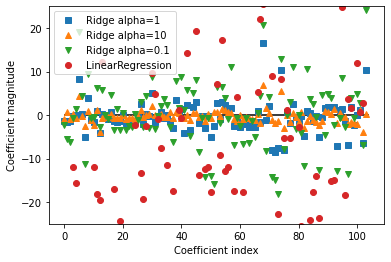

In [39]:
# alphaパラメータのモデルへの影響をみる

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
# 0,0の位置に係数分の長さ(特徴量の数)の水平線を引く
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [44]:
print("Coefficient length: {}".format(len(lr.coef_)))
print("Linear Regression coefficients:\n{}".format(lr.coef_))

Coefficient length: 104
Linear Regression coefficients:
[-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -

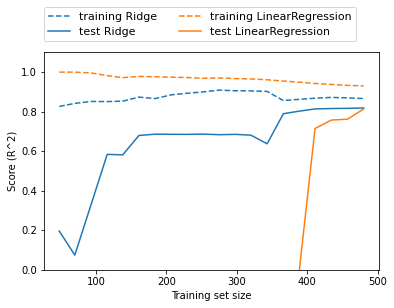

In [45]:
# 学習曲線の表示 訓練データ数ごとのスコアの変化
# 線形回帰とリッジ回帰(alpha=1)のモデルの比較

mglearn.plots.plot_ridge_n_samples()
# 十分な訓練データがある場合はリッジ回帰と線形回帰は同じ性能を示す。→正則化はあまり重要ではなくなってくる
# 訓練データが増えると、線形回帰は訓練性能が低下している。→過剰適合が難しくなる

In [48]:
# Lasso回帰
# 制約の掛け方が違う(L1正則化)。いくつかの係数が完全に0になっている。→いくつかの特徴量を無視し、自動的に特徴量を選択してモデルを解釈しやすくなる。

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [49]:
print("Coefficients:\n{}".format(lasso.coef_))

Coefficients:
[-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.41386744
 -0

In [51]:
# "max_iter(最大の繰り返し回数)"の値を増やす
# こうしないとモデルが"max_iter"を増やせと警告がくる

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [52]:
# alphaを小さくするとリッジ同様に正則化の効果が薄れ、過剰適合が発生する

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


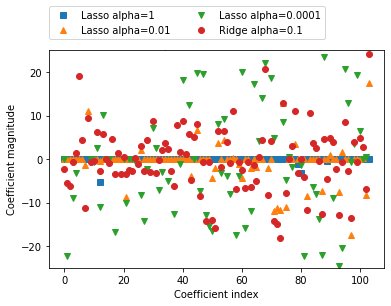

In [61]:
# alphaパラメータのモデルへの影響をみる

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-25, 25)
# データの説明を2*2で、場所を0,1.05の位置に表示
plt.legend(ncol=2, loc=(0, 1.05))

実際にはまずリッジ回帰を試してみると良い

特徴量がたくさんあって重要なものがわずかしかなさそうならLasso回帰が向いている

また、解釈しやすいモデルが欲しい時も重要な特徴量を選んでくれるLassoが向いている

RidgeとLassoのペナルティを組み合わせたElasticNetがscikit-learnにはある

実用上これが最良の結果をもたらすが、L1正則化とL2正則化のパラメータの2つを調整するコストがかかる

# クラス分類のための線形モデル

分類したいデータが関数より大きいか小さいかで分類する。決定境界が入力の線形関数となっている
線形モデルのアルゴリズムは2点で区別される

- 係数と切片の特定の組み合わせと訓練データの適合度を図る尺度
- 正規化を行うか、行うならどの方法か

基本的には1番目のアイテム(ロス関数)はあまり意味がない
ロジスティクス回帰(logistic regression)と線形サポートベクタマシン(linear support vector machines: SVM)は一般的な線形クラス分類アルゴリズム

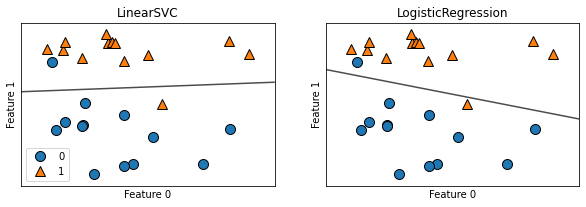

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()

これらのモデルは、リッジ回帰のようにL2正則化を行う

正則化の強度を決定するパラメータは**C**と呼ばれる。

Cが大きくなると正則化は弱くなる→訓練データに対して適合度をあげようとする

Cが小さくなると係数ベクトル(w)を0に近づけることを重視する

alphaとは性質が逆？

Cを小さくするとデータポイントの「大多数に」対し適合しようとするが、Cを大きくするとここのデータポイントを正確にクラス分類することを重視するようになる

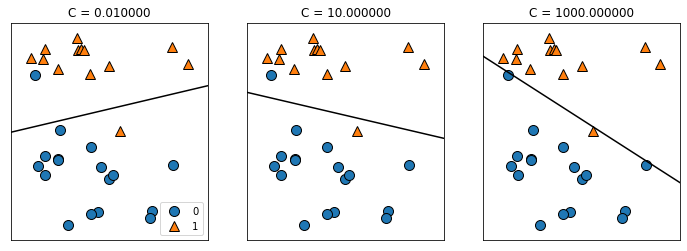

In [67]:
mglearn.plots.plot_linear_svc_regularization()
# 右のグラフ(C:大)は全ての点を正しく分類しようとして、過剰適合している
# 回帰の場合と同様に、線形モデルによるクラス分類は低次元空間においては制約が強く見える(境界が直線や平面にしかならないから)
# 高次元の場合には線形モデルによるクラス分類は非常に強力になっていく→特徴量が多い場合、過剰適合を回避する方法が重要になる

In [ ]:
# LogisticRegressionをcancerデータセットを使って解析
